# Sequência de Fibonacci

A sequência de Fibonacci é uma sequência infinita que começa com 0 e 1, e continua de tal forma que cada número é a soma dos dois números anteriores. Os números da sequência de Fibonacci também são chamados de números de Fibonacci.

A sequência começa com 0, 1, 1 para n = 0, n = 1 e n = 2, respectivamente.

A sequência de fibonacci é Fn=Fn−1+Fn−2 para n>2.

Aqui está um exemplo de código que usa recursão sem memoização para calcular a sequência de Fibonacci em Python. Esse código é muito ineficiente e leva muito tempo para executar.


In [8]:
# importa o módulo timeit
import timeit 

# define a função fibonacci que recebe um número n
def fibonacci(n): 
    if n <= 1:
        return n
    else: # se n for maior que um
# retorna a soma dos dois termos anteriores da  sequência de Fibonacci
        return fibonacci(n-1) + fibonacci(n-2) 

# mede o tempo para executar a função fibonacci com o argumento 10 mil vezes e guarda na variável tempo   
tempo = timeit.timeit("fibonacci(25)", setup="from __main__ import fibonacci", number=10000) 

print(f"{tempo} segundos") # imprime o valor da variável tempo em segundos

109.12832449999405 segundos


Agora utilizando memoização:

In [9]:

    import timeit

    # cria um dicionário chamado known com os dois primeiros termos da sequência de Fibonacci
    # Esse é o memo. Memos são valores que são armazenados e reutilizados para evitar cálculos repetidos. 
    known = {0:0, 1:1}

    # define uma função chamada fibonacci que recebe um argumento n
    def fibonacci(n):
        # verifica se n é um número inteiro não negativo
        if not isinstance(n, int) or n < 0:
            # se não for, lança uma exceção com uma mensagem de erro
            raise ValueError("n deve ser um número inteiro não negativo")
        # verifica se n está no dicionário known
        if n in known:
            # se sim, retorna o valor correspondente a n no dicionário
            return known[n]
        # se não, calcula o valor de Fibonacci de n usando a recursão
        res = fibonacci(n-1) + fibonacci(n-2)
        # armazena o valor calculado no dicionário com a chave n
        known[n] = res
        # retorna o valor calculado
        return res

    # mede o tempo para executar a função fibonacci com o argumento 10 dez mil vezes e guarda na variável tempo
    tempo = timeit.timeit("fibonacci(25)", setup="from __main__ import fibonacci", number=10000) 

    print(f"{tempo} segundos") # imprime o valor da variável tempo em segundos

0.0007872999995015562 segundos


O tempo é de 0.000762699986808002 segundos para rodar fibonacci(25) 10 mil vezes com memoização.

A razão pela qual o tempo de execução do primeiro código aumenta significativamente quando o valor de entrada n aumenta é porque a implementação recursiva sem memoização recalcula muitos valores repetidamente.

Por exemplo, para calcular `fibonacci(5)`, a função chama `fibonacci(4)` e `fibonacci(3)`. Para calcular `fibonacci(4)`, a função chama `fibonacci(3)` e `fibonacci(2)`. E assim por diante.

Note que para calcular `fibonacci(3)`, a função é chamada duas vezes. Isso significa que o valor de `fibonacci(3)` é recalculado duas vezes. À medida que n aumenta, o número de cálculos redundantes aumenta exponencialmente. Isso é conhecido como "explosão combinatorial" ou "efeito avalanche".

Por outro lado, a implementação memoizada evita a recalculação de valores repetidos armazenando os valores já calculados em um dicionário. Dessa forma, a função precisa calcular cada valor de Fibonacci apenas uma vez, resultando em um tempo de execução muito mais rápido para valores maiores de n.

Curiosamente, para `fibonacci(26)`, o primeiro código demora 177.73873550002463 segundos para rodar, enquanto o segundo código, com memoização, demora 0.0007798000006005168 segundos.

Já para `fibonacci(27)`, o primeiro código demora 293.5547017999925 segundos, o que equivale a 4 minutos e 53 segundos. Por outro lado, o código com memoização demora 0.0008590000215917826 segundos.

Adicionando um plot feito em Python para visualizar o que foi feito acima. O tempo sem memoização segue uma curva exponencial:



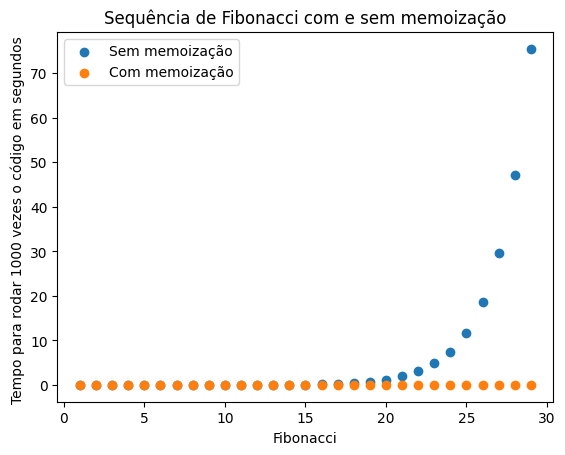

In [13]:
# Importar a biblioteca matplotlib.pyplot
import matplotlib.pyplot as plt
import timeit

def fibonacci(n): # define a função fibonacci que recebe um número n
    if n == 0: # se n for zero
        return 0 # retorna zero
    elif n == 1: # se n for um
        return 1 # retorna um
    else: # se n for maior que um
        return fibonacci(n-1) + fibonacci(n-2) # retorna a soma dos dois termos anteriores da sequência de Fibonacci

# cria um dicionário chamado known com os dois primeiros termos da sequência de Fibonacci
# Esse é o memo. Memos são valores que são armazenados e reutilizados para evitar cálculos repetidos. 
known = {0:0, 1:1}

# define uma função chamada fibonacci que recebe um argumento n
def fibonacci_(n):
    # verifica se n é um número inteiro não negativo
    if not isinstance(n, int) or n < 0:
        # se não for, lança uma exceção com uma mensagem de erro
        raise ValueError("n deve ser um número inteiro não negativo")
    # verifica se n está no dicionário known
    if n in known:
        # se sim, retorna o valor correspondente a n no dicionário
        return known[n]
    # se não, calcula o valor de Fibonacci de n usando a recursão
    res = fibonacci_(n-1) + fibonacci_(n-2)
    # armazena o valor calculado no dicionário com a chave n
    known[n] = res
    # retorna o valor calculado
    return res

# Definir as entradas e saídas desejadas
inputs = range(1,30)
outputs_no_memo = []    ## lista vazia
outputs_memo = []       ## lista vazia 

for n in inputs:
    tempo_no_memo = timeit.timeit("fibonacci({})".format(n), setup="from __main__ import fibonacci", number=1000)
    tempo_memo = timeit.timeit("fibonacci_({})".format(n), setup="from __main__ import fibonacci_", number=1000) 
    outputs_no_memo.append(tempo_no_memo)          ## adiciona a lista vazia com o método append
    outputs_memo.append(tempo_memo)                ## adiciona a lista vazia com o método append


# Plotar os valores da sequência de Fibonacci com e sem memoização como pontos
plt.scatter(inputs, outputs_no_memo, label = "Sem memoização")
plt.scatter(inputs, outputs_memo, label = "Com memoização")
plt.xlabel("Fibonacci")
plt.ylabel("Tempo para rodar 1000 vezes o código em segundos ")
plt.title("Sequência de Fibonacci com e sem memoização")
plt.legend()
plt.show()